In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_excel("/mnt/d/jacquard/files/situation-need-extracted.xlsx")
data.fillna("NONE", inplace=True)

In [3]:
posts =  data["Sound Bite Text"].values
# [
#     "Feeling stressed after a long day at work. Need to unwind with some yoga.",
#     "Taking a break from studying to enjoy a cup of tea and relax.",
#     "Hectic schedule today, craving some quiet time to recharge.",
#     "Feeling overwhelmed by deadlines. Need to prioritize self-care.",
#     "Finally finished that project! Time to celebrate with some ice cream.",
#     "Long commute ahead. Need something to listen to for relaxation.",
#     "Struggling to find motivation. Need a pick-me-up.",
#     "Spending the weekend with family. Need some quality time.",
#     "Feeling anxious about an upcoming presentation. Need some stress relief.",
#     "Looking forward to a cozy night in with a good book.",
#     "Just got back from a run. Feeling energized and refreshed.",
#     "Stuck in traffic. Need to find a way to stay calm.",
#     "Feeling uninspired today. Need some creative inspiration.",
#     "Dealing with a difficult situation at work. Need support and understanding.",
#     "Trying to juggle work and family responsibilities. Need better time management strategies.",
#     "Feeling burnt out from studying. Need a mental break.",
#     "Excited for vacation next week. Need some tips for packing efficiently.",
#     "Struggling to sleep lately. Need some relaxation techniques.",
#     "Just finished a workout. Need to refuel with a healthy meal.",
#     "Feeling lonely tonight. Need some social interaction.",
#     "Just received some bad news. Need some comfort.",
#     "Feeling overwhelmed by clutter at home. Need to declutter and organize.",
#     "Feeling disconnected from nature. Need to spend some time outdoors.",
#     "Looking for a new hobby to de-stress. Need some suggestions.",
#     "Feeling stuck in a rut. Need some motivation to get moving."
# ]



In [4]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define situations and needs
situations = data["Situation"].values
# [
#     "Long day at work",
#     "Break from studying",
#     "Hectic schedule",
#     "Overwhelmed by deadlines",
#     "Just finished a project",
#     "Long commute",
#     "Lack of motivation",
#     "Spending time with family",
#     "Anxiety about presentation",
#     "Cozy night in",
#     "Just finished a run",
#     "Stuck in traffic",
#     "Feeling uninspired",
#     "Difficult situation at work",
#     "Juggling work and family responsibilities",
#     "Burnout from studying",
#     "Excited for vacation",
#     "Trouble sleeping",
#     "Just finished a workout",
#     "Feeling lonely",
#     "Received bad news",
#     "Overwhelmed by clutter at home",
#     "Feeling disconnected from nature",
#     "Looking for a new hobby",
#     "Feeling stuck in a rut"
# ]

needs = data["Need"].values
# [
#     "Need to unwind with yoga",
#     "Need to relax with tea",
#     "Need quiet time to recharge",
#     "Need to prioritize self-care",
#     "Need to celebrate",
#     "Need something to listen to for relaxation",
#     "Need a pick-me-up",
#     "Need quality time with family",
#     "Need stress relief",
#     "Need a cozy night in",
#     "Need to feel energized and refreshed",
#     "Need to stay calm",
#     "Need creative inspiration",
#     "Need support and understanding",
#     "Need better time management strategies",
#     "Need a mental break",
#     "Need tips for packing efficiently",
#     "Need relaxation techniques for better sleep",
#     "Need to refuel with a healthy meal",
#     "Need social interaction",
#     "Need comfort",
#     "Need to declutter and organize",
#     "Need to spend time outdoors",
#     "Need suggestions for a new hobby",
#     "Need motivation to get moving"
# ]

# Create binary matrix representation
binary_matrix = np.zeros((len(situations) + len(needs), len(situations) + len(needs)))

# Populate binary matrix
for i, situation in enumerate(situations):
    for j, need in enumerate(needs):
        binary_matrix[i][len(situations) + j] = 1 if situation in need else 0

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(binary_matrix)

# Print cosine similarity matrix
print("Cosine Similarity Matrix:")
print(cosine_sim_matrix)


Cosine Similarity Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch
import seaborn as sns

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('BAAI/bge-base-en-v1.5')
model = BertModel.from_pretrained('BAAI/bge-base-en-v1.5')

# # Define situations and needs
# situations = [
#     "Long day at work",
#     "Break from studying",
#     ...
# ]

# needs = [
#     "Unwind with yoga",
#     "Relax with tea",
#     ...
# ]

# Function to generate BERT embeddings
def generate_bert_embeddings(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    # Forward pass through BERT model
    with torch.no_grad():
        outputs = model(**inputs)
    # Extract embeddings from BERT model output
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embeddings

# Map situations and needs to BERT embeddings
text_embeddings = [generate_bert_embeddings(post) for post in posts]
situation_embeddings = [generate_bert_embeddings(situation) for situation in situations]
need_embeddings = [generate_bert_embeddings(need) for need in needs]

/home/pbs/miniconda3/envs/semantic-router/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


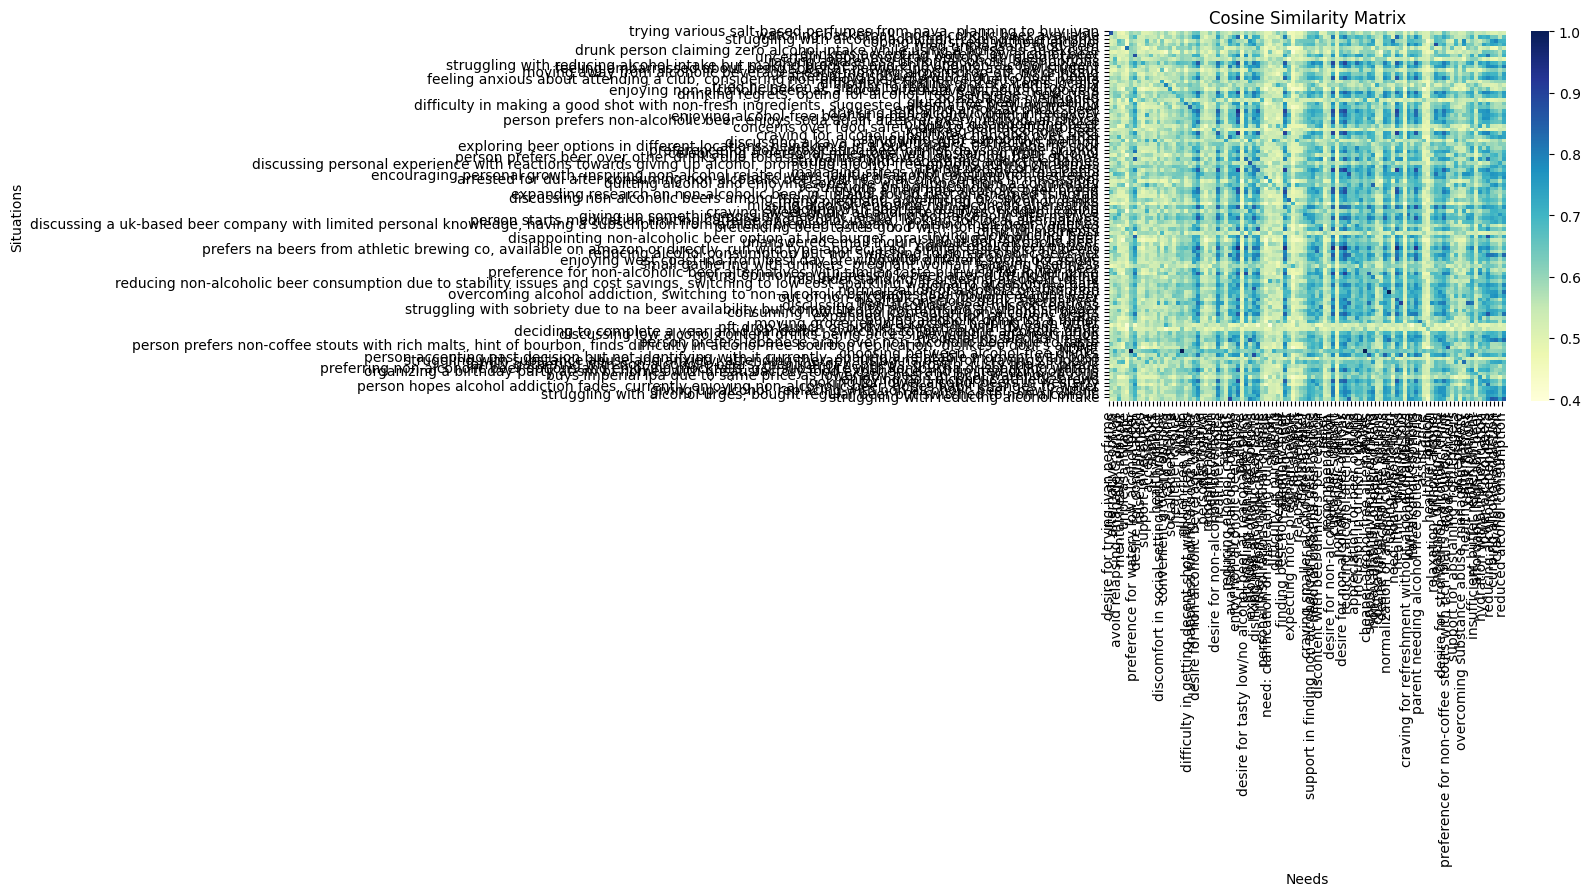

In [6]:

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(situation_embeddings, need_embeddings)

# Create heatmap
sns.heatmap(cosine_sim_matrix, cmap="YlGnBu")

# Add labels and title
plt.xlabel("Needs")
plt.ylabel("Situations")
plt.title("Cosine Similarity Matrix")

# Add situation and needs labels
plt.xticks(np.arange(len(needs)), needs, rotation=90)
plt.yticks(np.arange(len(situations)), situations)

# Show the plot
plt.show()



In [7]:
cosine_sim_matrix

array([[0.8669082 , 0.5723381 , 0.4873954 , ..., 0.50532234, 0.5336283 ,
        0.51662135],
       [0.54078376, 0.5782178 , 0.5110279 , ..., 0.637718  , 0.55019754,
        0.6655897 ],
       [0.51100695, 0.5300699 , 0.67097396, ..., 0.79217744, 0.7046591 ,
        0.69860727],
       ...,
       [0.5353466 , 0.5970637 , 0.5992107 , ..., 0.74872017, 0.65563715,
        0.77247614],
       [0.5701442 , 0.56622964, 0.6286396 , ..., 0.7213661 , 0.6601505 ,
        0.73904234],
       [0.5191051 , 0.5469781 , 0.6850022 , ..., 0.841568  , 0.7404872 ,
        0.8554853 ]], dtype=float32)

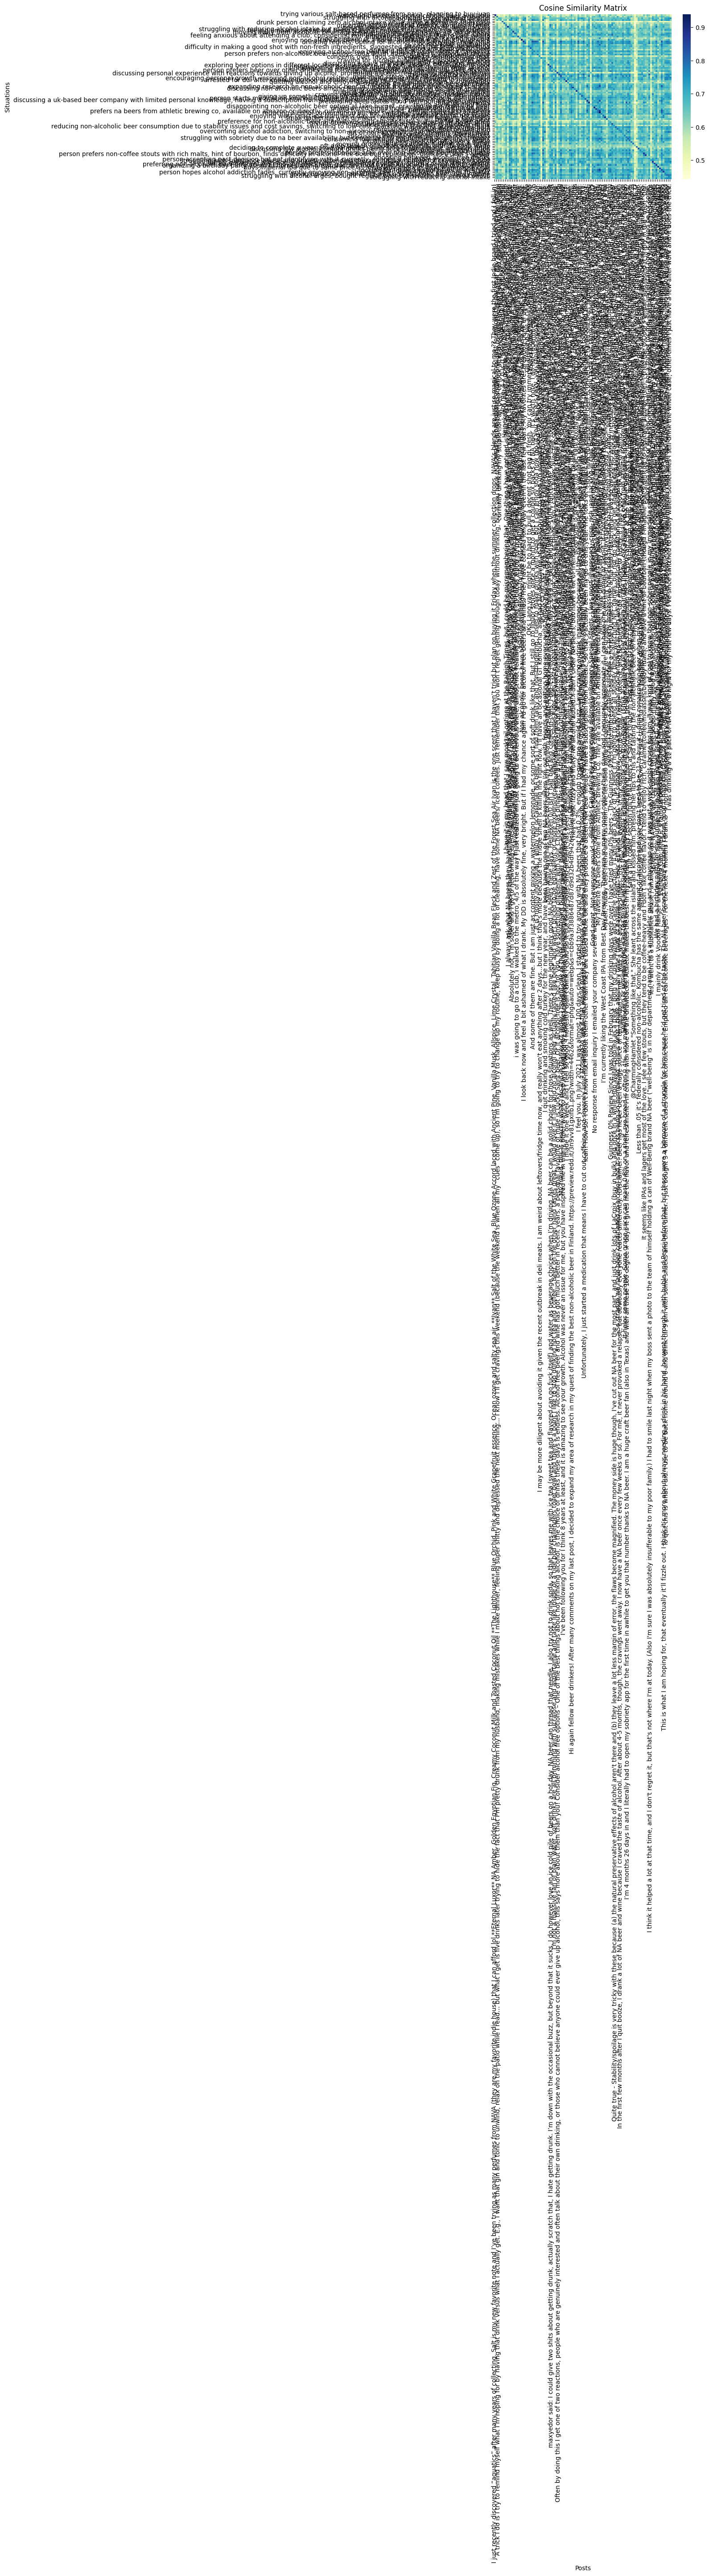

In [8]:

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(text_embeddings, situation_embeddings)
# Create heatmap
sns.heatmap(cosine_sim_matrix, cmap="YlGnBu")

# Add labels and title
plt.xlabel("Posts")
plt.ylabel("Situations")
plt.title("Cosine Similarity Matrix")

# Add situation and needs labels
plt.xticks(np.arange(len(posts)), posts, rotation=90)
plt.yticks(np.arange(len(situations)), situations)

# Show the plot
plt.show()



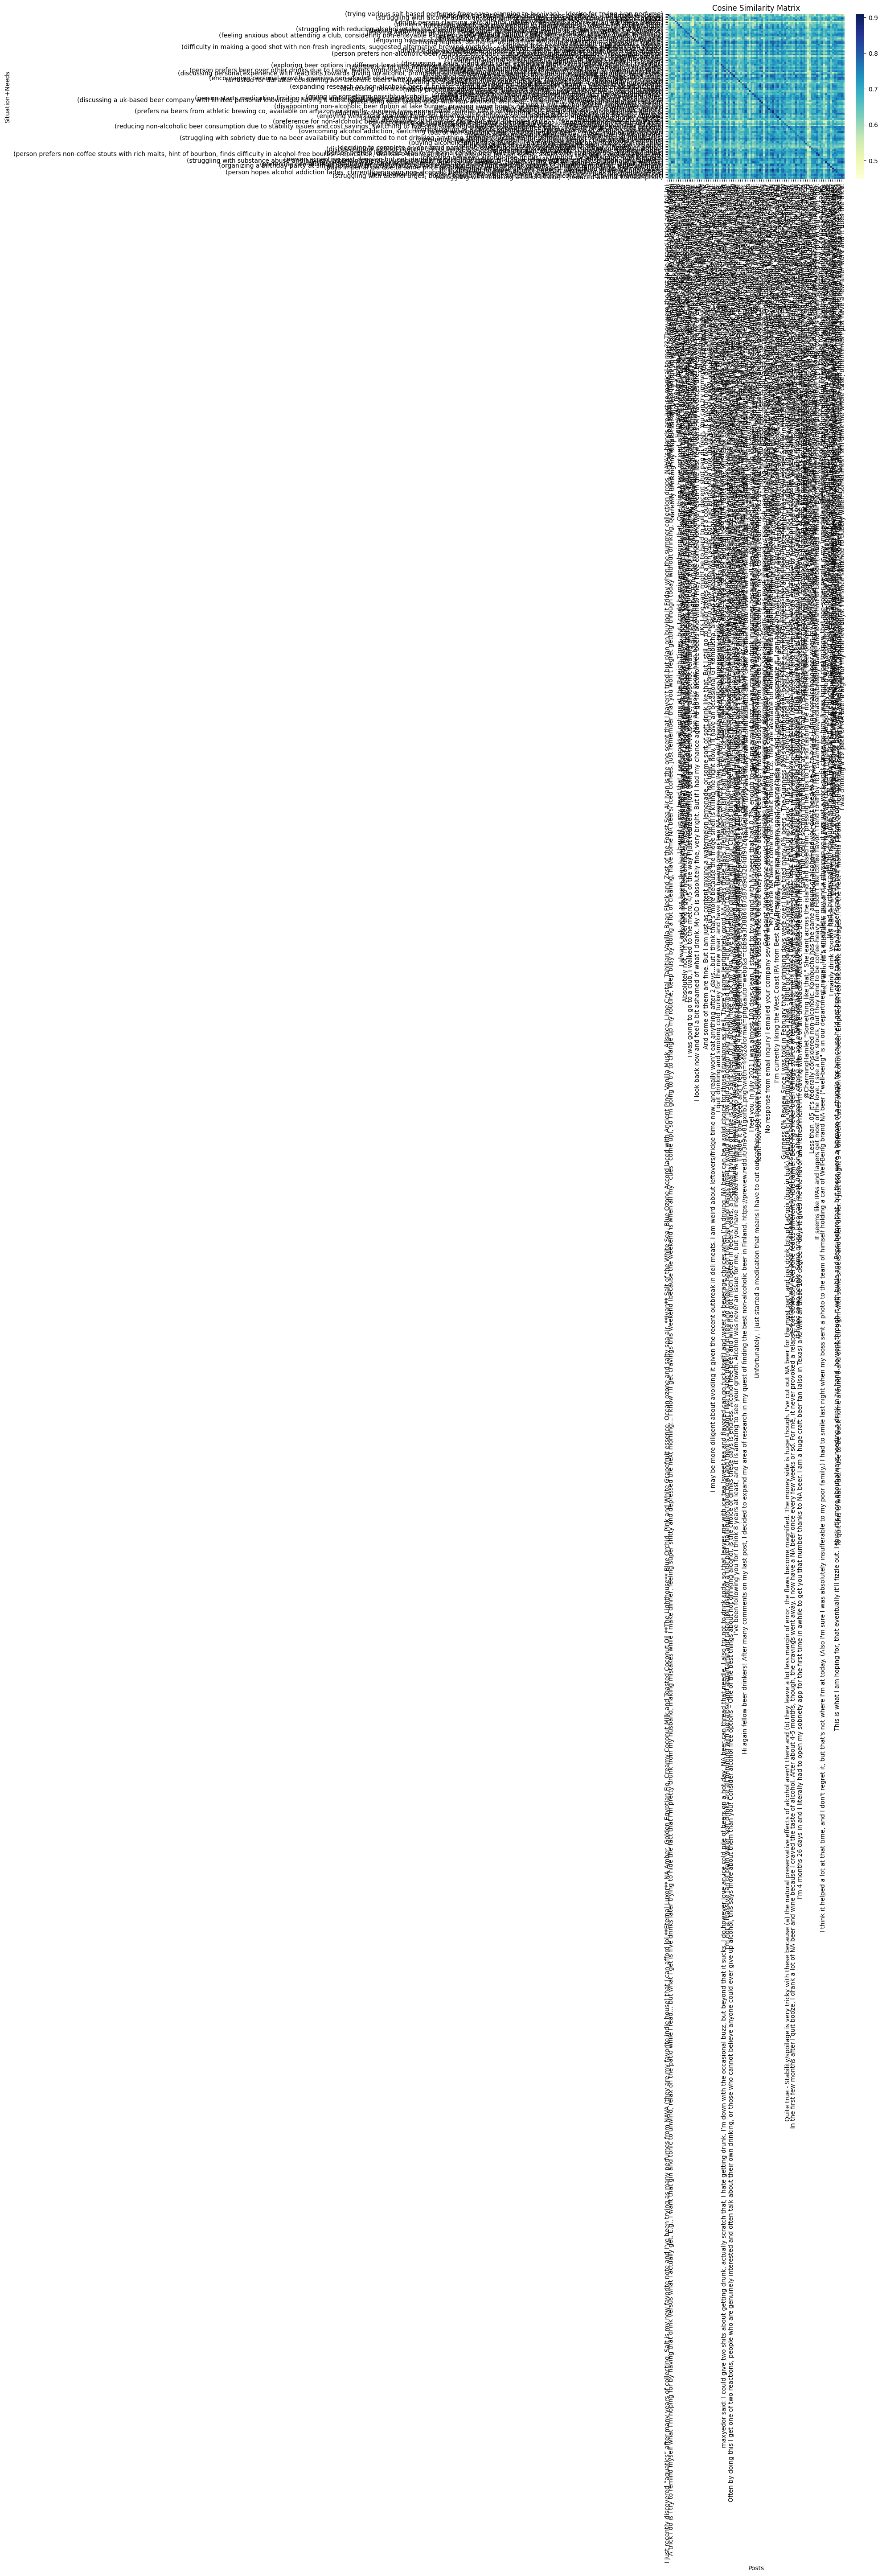

In [14]:
import json

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(text_embeddings, np.mean([situation_embeddings, need_embeddings], axis=0))
 
# Create heatmap
sns.heatmap(cosine_sim_matrix, cmap="YlGnBu")

# Add labels and title
plt.xlabel("Posts")
plt.ylabel("Situation+Needs")
plt.title("Cosine Similarity Matrix")

# Add situation and needs labels
plt.xticks(np.arange(len(posts)), posts, rotation=90)
plt.yticks(np.arange(len(situations)),  [ f'({s}) - ({n})' for s, n in zip(situations, needs)])

# Show the plot
plt.show()





In [16]:
import json 
import numpy as np
# Concatenate situations and needs
situation_needs = [f'{s} - {n}' for s, n in zip(situations, needs)]
# BEGIN: CELL
# Multiply each value in cosine_sim_matrix by 100 and convert to integer
cosine_sim_matrix = (cosine_sim_matrix * 100).astype(int)

# Print the updated cosine_sim_matrix
print(cosine_sim_matrix)
# END: CELL

# Create a dictionary with the heatmap data
heatmap_data = {
    'posts': posts.tolist(),
    'situation_needs': situation_needs,
    'cosine_sim_matrix': cosine_sim_matrix.tolist()
}

# Convert the dictionary to JSON
heatmap_json = json.dumps(heatmap_data)

# Print the JSON data
# Specify the file path
file_path = "/mnt/d/113industries/github/pbs/113industries/research/jtbd/repos/how-to-bind-data-to-the-vue-heatmap-chart-component/public/heatmap.json"

# Save the JSON data to the file
with open(file_path, "w") as file:
    json.dump(heatmap_data, file)


[[8600 6300 5400 ... 5600 6000 5400]
 [5700 7400 5800 ... 6500 6500 6100]
 [6100 6500 7800 ... 7300 8000 7200]
 ...
 [6100 7200 7500 ... 8100 8300 7900]
 [6500 7200 7200 ... 7200 8100 7100]
 [6100 7100 6800 ... 7700 7600 7500]]


In [13]:

# Create a dictionary with the heatmap data
heatmap_data = {
    'posts': posts.tolist(),
    'situation_needs': situation_needs,
    'cosine_sim_matrix': normalized_matrix
}

# Convert the dictionary to JSON
heatmap_json = json.dumps(heatmap_data)

# Print the JSON data
# Specify the file path
file_path = "/mnt/d/113industries/github/pbs/113industries/research/jtbd/repos/how-to-bind-data-to-the-vue-heatmap-chart-component/src/assets/heatmap.json"

# Save the JSON data to the file
with open(file_path, "w") as file:
    json.dump(heatmap_data, file)
    
print(heatmap_json)
    

{"posts": ["I just recently discovered \u201caquatics\u201d after many years of collecting. Salt is my new favorite note and I\u2019ve been trying as many perfumes from NAVA (they are my favorite indie house) that I can afford lol **Eternal Luxor** NA Amber, Golden Egyptian Fig, Creamy Coconut Milk and Toasted Coconut Oil **The Lighthouse** Blue Orchid, Pink and White Grapefruit essence, Ocean ozone and salty sea air. **Ivan** Salt of the White Sea, Blue Ozone Accord laced with Ancient Pine, Vanilla Musk, Allspice, Lime Crystal, Tahitian Vanilla Bean Fleck and Zest of the Forest Sea Air Ivan is the one scent that I haven\u2019t tried but plan on buying it Friday when the summer collection drops. NAVA\u2019s blends are just so magical to me ?? They were the first Indie brand I tried and I fell in!", "Going to a basketball tonight and I just found out the bar near my section serves NA beer!!", "A trick I do is I try to remind myself what I\u2019m hoping for by having that drink versus wh

In [ ]:
posts.tolist()